# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Анализ данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
from pymystem3 import Mystem

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/data.csv')

In [3]:
# изучение общей информации о наборе данных
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
# переведем данные об образовании и семейном положении в нижний регистр методом str.lower()
df['family_status'].str.lower().head(10)
df['education'].str.lower().head(10)

0     высшее
1    среднее
2    среднее
3    среднее
4    среднее
5     высшее
6     высшее
7    среднее
8     высшее
9    среднее
Name: education, dtype: object

In [5]:
# переведем отрицательные значения столбца days_employed в положительные
df['days_employed'] = df['days_employed'].abs()

**Вывод**

<div style="border:solid green 2px; padding: 20px">

В исходных данных (таблице) 12 столбцов: 
- 2 столбца с типом данных float64 (вещественые числа);
- 5 столбцов с типом данных int64 (целые числа);
- 5 столбцов с типом данных object (строковые значения).

Названия колонок:

- `children` — количество детей в семье
- `days_employed` — трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — образование клиента
- `education_id` — идентификатор образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — доход в месяц
- `purpose` — цель получения кредита
    
В названиях колонок нарушений стиля не наблюдается.
    
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.
    
Бросается в глаза столбец `days_employed` значения данных о трудовом стаже в днях имеют и отрицательные и положительные значения, причем положительные значения в основном у пенсионеров. Такие ошибки могли возникнуть в резултате сбоя при выгрузке данных либо при внесении данных сотрудниками банка. С этим предстоит разобраться. Переведем отрицательные значения столбца `days_employed` в положительные методом abs().
    
Данные об образовании также заполнены не коректно, имеются значения верхнего и нижнего регистра. Переведем данные об образовании и семейном положении в нижний регистр методом str.lower().
    
Цели получения кредита purpose хранятся в виде строк разной длины.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных. Чтобы двигаться дальше, нужно устранить проблемы в данных.
</div>    

## Шаг 2. Предобработка данных

### Обработка пропусков

In [6]:
# подсчёт пропусков в таблице: 
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [7]:
# расчитаем среднее значение и медиану для days_employed:
df['days_employed'].median()
df['days_employed'].mean()

66914.72890682236

In [8]:
# расчитаем медиану для total_income:
df['total_income'].median()

145017.93753253992

In [9]:
# напишем цикл
# пропуски в столбцах days_employed, total_income заполним медианными значениями  
columns_to_replace = ['days_employed', 'total_income'] 
for column in columns_to_replace:
    df[column] = df[column].fillna(value=df[column].median())
    
# убедимся, что в таблице не осталось пропусков    
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

<div style="border:solid green 2px; padding: 20px">
Сначала посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов pandas: isna() и sum().

Обнаружено одинаковое количество пропусков в колонках `days_employed` и `total_income`. Для некоторых клиентов не указаны значения трудового стажа в днях и дохода в месяц.

Взможные причины появления пропусков в данных: либо у клиентов отсутствуют указанные данные, например клиент не имеет трудового стажа, то и данных об официальном доходе тоже нет, либо произошел сбой при выгрузке данных из базы. 

На практике необходимо правильно установить причину пропусков, запросить информацию и восстановить данные. Однако такой возможности нет в учебном проекте. Придётся:
- заполнить и эти пропуски явными обозначениями,
- оценить, насколько они повредят расчётам.

Стаж и доход - количественные переменные. Пропуски в таких переменных заполняют характерными значениями. Это значения, характеризующие состояние выборки, — набора данных, выбранных для проведения исследования. Чтобы примерно оценить типичные значения выборки, годятся среднее арифметическое mean() или медиана median().

Расчитаем среднее арифметическое значение и медиану для столбца days_employed, посмотрим на сколько отличаются эти значения. Расчет показал одинаковое значение, соответсвенно в дальнейших расчетах возможно испльзовать любой из этих методов. 

Однако при анализе данных о стаже клиентов, обнаружены выдающиеся значения. Когда в выборке присутствуют выдающиеся значения (340266 против 152), лучше использовать медиану.

Расчитаем медиану также для `otal_income`, применим метод median(). И заменим пропуски в столбцах. Создадим список `columns_to_replace` и переберем его элементы циклом for и для столбца `days_employed` и `total_income`, выполним замену пропущенных значений методом fillna(). Он вернёт копию исходного столбца, заменяя все NaN на значение из аргумента.

Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения методами isna() и sum(). Все пропуски заполнены.
</div> 

### Замена типа данных

In [10]:
# замена вещественного типа данных на целочисленный в колоках days_employed и total_income:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')

# проверим тип значений в таблице после изменения:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

<div style="border:solid green 2px; padding: 20px">
Колонки `days_employed` и `total_income` имеют тип данных float64 (вещественные числа), произведем замену на целые числа типа int64. Для этого воспользуемся аргументом ('int') метода astype(), кторый означает, что значение нужно перевести в целое число.
Затем проверим результат замены типа даных методом info(). Тип данных изменился. Двигаемся дальше.
</div>

### Обработка дубликатов

In [11]:
# посчитаем явные дубликаты:
df.duplicated().sum()

54

In [12]:
# удалим явные дубликаты:
df = df.drop_duplicates().reset_index(drop=True)

# проверка на отсутствие дубликатов:
df.duplicated().sum()

0

**Вывод**

<div style="border:solid green 2px; padding: 20px">
Посчитаем явные дубликаты в таблице одной командой: duplicated().sum(). Метод duplicated() возвращает Series со значением True для строк-дубликатов. Чтобы посчитать такие строки, результат метода передают функции sum(). Анализ выявил 54 дубликата.

Возможные причины появления дубликатов - это могут быть данные с ошибками или альтернативные названия одних и тех же данных.

Без дубликатов исследование станет более точным.
Далее удалим явные дубликаты с удалением старых индексов и формированием новых одной командой: drop_duplicates().reset_index(drop=True). Метод drop_duplicates() избавляется от дубликатов. После удаления строчек обновим индексацию, чтобы в ней не осталось пропусков методом reset_index(). Чтобы не создавать столбец index у метода reset_index() изменим специальный параметр: reset_index(drop=True).

После удаления, проверим таблицу на отсутсвие дубликатов. Дубликаты не обнаружены, продолжаем анализ.
</div>    

### Лемматизация

In [13]:
# напишем функцию для нахождения лемм по столбцу purpose
# импортируем библиотеку для лемматизации
# находим лемы по строкам
# возвращаем значение из функции
# добавим столбец со значениями лемм

m = Mystem()

def lemmas_purpose(purpose):
    purpose = ' '.join(m.lemmatize(purpose))
    return purpose

df['lemmas'] = df['purpose'].apply(lemmas_purpose)

df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,покупка жилье \n
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операция с жилье \n
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование \n
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,на проведение свадьба \n
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,покупка жилье для семья \n


**Вывод**

<div style="border:solid green 2px; padding: 20px">
Приведеем слова в колонке 'purpose' к их словарной форме (лемме) - этот процесс процесс называется лемматизация. И добавим лемматизированные слова в новый столбец 'lemmas'. Для этого необходимо вызвать библиотеку с функцией лемматизации на русском языке — pymystem3.

Затем объявим функцию lemmas_purpose с параметром (purpose). Здесь purpose это переменная, через которую я буду передавать имя колонки в функцию для лемматизации. Затем создадим новый столбец 'lemmas' со значениями-результатами работы функции lemmas_purpose(). Метод apply() применяем к датафрейму df. По умолчанию Pandas передаёт в функцию lemmas_purpose() столбец.
Двигаемся дальше.
</div>

### Категоризация данных

In [14]:
# категоризация данных по целям кредита 

# выведем на экран список видов целей по кредитам столбца lemmas
df['lemmas'].value_counts().head(20)


автомобиль \n                                    972
свадьба \n                                       793
на   проведение   свадьба \n                     773
сыграть   свадьба \n                             769
операция   с   недвижимость \n                   675
покупка   коммерческий   недвижимость \n         662
покупка   жилье   для   сдача \n                 652
операция   с   жилье \n                          652
операция   с   коммерческий   недвижимость \n    650
жилье \n                                         646
покупка   жилье \n                               646
покупка   жилье   для   семья \n                 638
строительство   собственный   недвижимость \n    635
недвижимость \n                                  633
операция   со   свой   недвижимость \n           627
строительство   жилой   недвижимость \n          625
покупка   недвижимость \n                        621
покупка   свой   жилье \n                        620
строительство   недвижимость \n               

In [15]:
# создаем функцию для категоризации целей кредита 

def lemmas_group(text):
    
    if 'жилье' in text:
        return 'недвижимость'
    
    if 'недвижимость' in text:
        return 'недвижимость'
    
    if 'автомобиль' in text:
        return 'автомобиль'
        
    if 'образование' in text:
        return 'образование'
        
    if 'свадьба' in text:
        return 'свадьба' 

# проверим работу функции    
#print('свадьба')
#print('жилье')
print('жилье')

жилье


In [16]:
# добавим в таблицу df новый стоблец с данными о категорицации целей кредита
df['purpose_group'] = df['lemmas'].apply(lemmas_group)       

# отсортируем данные по целям кредита
df['purpose_group'].value_counts()

недвижимость    10814
автомобиль       4308
образование      4014
свадьба          2335
Name: purpose_group, dtype: int64

In [17]:
# категоризация по уровню дохода:

# напишем функцию

def alert_group(messages):
    
    if messages <=50000:
        return 'низкий'
    
    if messages <=200000:
        return 'средний'
    
    return 'высокий'

df['income_group'] = df['total_income'].apply(alert_group)

# проверим рабоу функции
#print(alert_group(45000))
#print(alert_group(100000))
print(alert_group(550000))

высокий


In [18]:
# выведем на экран таблицу df проверим добавление столбца
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas,purpose_group,income_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n,недвижимость,высокий
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n,автомобиль,средний
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n,недвижимость,средний
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n,образование,высокий
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n,свадьба,средний
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,покупка жилье \n,недвижимость,высокий
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операция с жилье \n,недвижимость,высокий
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование \n,образование,средний
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,на проведение свадьба \n,свадьба,средний
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,покупка жилье для семья \n,недвижимость,средний


In [19]:
# категоризация по количеству детей:

# подсчитаем количество заемщиков по количеству детей
df['children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [20]:
# подсчитаем количество должников и добросовестных плательщиков
df['debt'].value_counts()

0    19730
1     1741
Name: debt, dtype: int64

In [21]:
# переведем отрицательные значения столбца children в положительные:
df['children'] = df['children'].abs()

In [22]:
# составим функцию для определения зависимости между наличием детей и возвратом кредита в срок
# cоздаем два списка, в одном — значения, в другом — названия столбцов датафрейма
# формируем строку
# передаем строку в качестве аргумента функции для тестирования
# проверяем работу функции при разных значениях на входе
# создадим новый столбец
# расчитаем значения каждой категории

row_values = [1, 1]
row_columns = ['debt', 'children']
row = pd.Series(data=row_values, index=row_columns)  

def alert_group_importance(row):
    children = row['children']
    debt = row['debt']
    
    if children >=1:
        if debt == 1:
            return 'должники с детьми'
        
        return 'плательщики с детьми'
        
    if children == 0:
        if debt == 1:
            return 'должники без детей'
        
        return 'плательщики без детей'

# создадим в таблице df новый столбец 'children_debt' и добавим в него данные функции 
df['children_debt'] = df.apply(alert_group_importance, axis=1)

# подсчитаем количество должников и плательщиков по наличию детей
df['children_debt'].value_counts()

плательщики без детей    13044
плательщики с детьми      6686
должники без детей        1063
должники с детьми          678
Name: children_debt, dtype: int64

**Вывод**

<div style="border:solid green 2px; padding: 20px">
Выведем на экран список целей по кредитам столбца 'lemmas' применив метод value_counts(). 
Обратим внимание, что в многие из них многократно повторяются или одно и то же записано разными словами. 
Ориентироваться в таких данных очень сложно. Гораздо правильнее разделить цели на категории и каждой категории присвоить значение. 

Для этого создадим "словарь". И будем обращаться уже не к длинной строке, а к названию категории.

Распределим клиентов по целям кредита:
- покупка, строительство недвижимости и/или жилья - в категорию «недвижимость»;
- покупка, приобретения автомобия — категория «автомобиль»;
- получение образования  - категория «образование»;
- проведение свадьбы  - категория «свадьба»;
- ремонт жилья  - категория «ремонт жилья»;

Для этого напишем функцию def и передадим ей значения столбца 'lemmas'. Проверим работу функции, выводя на экран разные категории целей кредита. Функция работает корректно. Далее создадим новый столбец 'purpose_group' в таблице df и добавим в него значения функции lemmas_group().   

Отсортируем данные по созданным категориям в столбце 'purpose_group' методом value_counts(). Теперь с данными намного проще работать. Стало понятно, больше всего кредитов в категории 'недвижимость', меньше всего в категории 'свадьба'.
</div>

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [23]:
# на основе данных создадим нову таблицу children_frame
data = [['без детей', 13044, 1063],
        ['с детьми', 6686, 678]] 

columns = ['children_status','pay','debt']

children_frame = pd.DataFrame(data=data, columns=columns) 

# создадим в таблице children_frame новый столбец 'ratio' и сохраните в нём значение отношения должников
# 'debt' к плательщикам 'pay'
children_frame['ratio'] = (children_frame['debt'] / children_frame['pay']) * 100

# выведем таблицу children_frame на экран
display(children_frame)

,children_status,pay,debt,ratio
0,без детей,13044,1063,8.149341
1,с детьми,6686,678,10.140592


<AxesSubplot:xlabel='children_status', ylabel='ratio'>

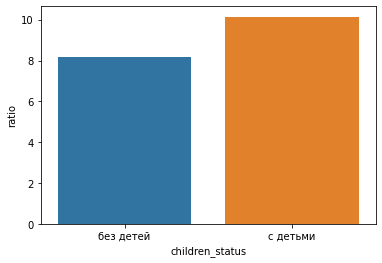

In [24]:
#визуализируем полученные данные, построим столбчатую диаграмму

import seaborn 
seaborn.barplot(x=children_frame['children_status'], y=children_frame['ratio'])

**Вывод**

<div style="border:solid green 2px; padding: 20px">
Сначала выведем количество заемщиков по количеству детей. Расчет показал, что заемщиков без детей больше чем с детьми.
На втором месте заемщики с одним ребенком. На третьем месте заемщики с двумя детьми. Заемщиков с тремя и более детей гораздо меньше.

Также в данных о детях имеется артефакт с отрицательным показателем детей (47 семей имеют -1 ребенка), это значение не отражает действительности, т.к. отрицательное количество детей быть не может. Возможная причина появления таких данных - опечатка при внесении количества детей. Поменяем отрицателное значение на положительное методом abs().

Кроме того, в данных о детях имеется еще один артефакт с завышеным показателем - 76 заемщико имеют по 20 детей. Это может быть либо многодетные семьи с приемными детьми, либо опечатки при внесении данных. Чтобы разобраться надо запрашивать информацию, однако у нас такой возможности нет, поэтому примем эти семьи за многодетные.

Затем подсчитаем общее количество должников и добросовестных заемщиков. Данные показали, что в большинсво заемщиков оплачивает кредит вовремя. Должников гораздо меньше.

Для определения зависимоти между наличием детей и возвратом кредита в срок сгруппирем данные и составим функцию.

Распределим клиентов так:
- если у клиента есть дети и есть задолженность возвращать "должники с детьми"
- если есть дети и нет задолженности "плательщики с детьми"
- если нет детей и есть задолженность "должники без детей"
- если нет детей и нет задолженности "плательщики без детей"

Создаем два списка. В одном — значения, в другом — названия столбцов датафрейма. Формируем строку. Передаем строку в качестве аргумента функции для тестирования. Проверяем работу функции при разных значениях на входе.

Функция работает корректно. Создаем новый столбец df['children_debt'] со значениями-результатами работы функции alert_group_importance. 

Метод apply() применяем к датафрейму. Чтобы на вход в функцию отправлялись строки, нужно указать параметр axis = 1 метода apply().

Применим метод value_counts() для подсчёта значений каждой категории. На первый взгляд значение в категории 'плательщики без детей' больше чем плательщиков с детьми, однако и должников среди них больше чем должников с детьми. Для более детального расчета посчитаем отношение должников к плательщикам в каждой категории и на основе этих данных создадим новую таблицу children_frame, где,
- 'children_status' содержит название категории заемщиков по наличию детей: 'с детьми', 'без детей'.
- 'pay' содержит значения о количестве добросовестных плательщиков каждой категории.
- 'debt' содержит значения о количестве должников каждой категории.
- 'ratio' содержит значения отношения должников к плательщикам каждой категории.

В категории 'без детей' доля дожников к плательщикам составляет 8%.
В категории 'с детьми' доля дожников к плательщикам составляет 10%.
Разница в значениях составляет 2%, если визуализировать эти данные при помощи столбчатой диаграммы, разница видна. 
Для построения столбчатой диаграммы вызвали библиотеку seaborn и передали ее осям значения из таблицы children_frame, x=children_frame['children_status'], y=children_frame['ratio'].

Если произвести обратный расчет, то данные покажут, что добросовестных плательщиков в категории 'с детьми' 90% от числа должников. Добросовестных плательщиков в категории 'без детей' 92%.

Расчеты показали, что возврат кредита не связан напрямую от наличия детей, т.к. должники имеются как среди клинетов с детми, так и без детей. Клиентов с детьми возвращающих кредит намного больше, чем должников. 

Гипотеза о том, что есть зависимости между наличием детей и возвратом кредита в срок (по предоставленным на анализ данным) подтверджается частично.
</div>

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
#узнаем сколько разных статусов в столбце 'family_status'
df['family_status'].value_counts()

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [26]:
# напишем функцию для подсчета должников и добросовестных заемщиков по семйному положению

def debt_family(family_status_id, debt):
    track_list = df[(df['family_status'] == family_status_id) & (df['debt'] == debt)]
    track_list_count = track_list['family_status_id'].count()
    return track_list_count

# вызовим функцию debt_family() меняя значение параметров — так,
# чтобы получить данные для каждой категории семейного положения
# о наличии и отсутствии задолженности по возврату кредита

debt_family('женат / замужем', 0) #количество добросовестных заемщиков в браке  
debt_family('женат / замужем', 1) #количество должников в браке

debt_family('гражданский брак', 0)
debt_family('гражданский брак', 1)

debt_family('вдовец / вдова', 0)
debt_family('вдовец / вдова', 1)

debt_family('в разводе', 0)
debt_family('в разводе', 1)

debt_family('не женат / не замужем', 0)
debt_family('не женат / не замужем', 1)

#на основе данных функции создадим нову таблицу data
data = [['женат / замужем', 11413, 931],
        ['гражданский брак', 3775, 388],
        ['вдовец / вдова', 896, 63],
        ['в разводе', 1110, 85],
        ['не женат / не замужем', 2536, 274]] 

columns = ['family_status','pay','debt']

family_frame = pd.DataFrame(data=data, columns=columns) 
display(family_frame)

,family_status,pay,debt
0,женат / замужем,11413,931
1,гражданский брак,3775,388
2,вдовец / вдова,896,63
3,в разводе,1110,85
4,не женат / не замужем,2536,274


In [27]:
#посчитаем долю неплательщиков среди заемщиков по семейному положению

debt = list(family_frame['debt']) # список с количеством должников
pay = list(family_frame['pay']) # список с количеством плательщиков

share = [] #созаем пустой список

#напишем функцию для расчета доли
for index in range(len(debt)): 
    share.append((debt[index] / pay[index]) * 100) 

print(share)


[8.157364409007272, 10.278145695364238, 7.03125, 7.657657657657657, 10.804416403785488]


<AxesSubplot:ylabel='family_status'>

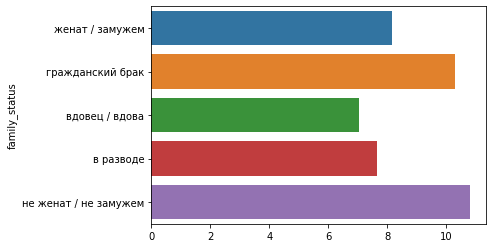

In [28]:
#визуализируем полученные данные, построим столбчатую диаграмму
import seaborn 
seaborn.barplot(x=share, y=family_frame['family_status'])

In [29]:
# создадим в таблице family_frame новый столбец 'ratio' и сохраните в нём значение отношения должников
# 'debt' к плательщикам 'pay'
family_frame['ratio'] = (family_frame['debt'] / family_frame['pay']) * 100

# выведем таблицу family_frame на экран
display(family_frame)

,family_status,pay,debt,ratio
0,женат / замужем,11413,931,8.157364
1,гражданский брак,3775,388,10.278146
2,вдовец / вдова,896,63,7.031250
3,в разводе,1110,85,7.657658
4,не женат / не замужем,2536,274,10.804416


**Вывод**

<div style="border:solid green 2px; padding: 20px">
Узнаем какие статусы о семейном положении содержатся в столбце 'family_status' и их количесво 
методом value_counts().

Данные показали, что заемщики по семейному положению поделены на:
- женат / замужем          12344
- гражданский брак          4163
- не женат / не замужем     2810
- в разводе                 1195
- вдовец / вдова             959

Данные показали, что заемщиков в официальном браке гораздо больше, чем в гражданском браке, холостых или находящихся в разводе. Меньше всего заемщиков категории вдовец/вдова.

Для определения зависимоти между семейным положением и возвратом кредита в срок составим функцию debt_family с двумя параметрами (family_status_id, debt).
С помощью последовательной фильтрации с логической индексацией она сначала получит из исходной таблицы df строки с нужным семейным положением, затем из результата отфильтрует строки имел ли клиент задолженность по возврату кредитов, методом count() посчитает количество значений в колонке 'family_status_id'. Это количество функция вернёт в качестве результата.

Затем вызовим функцию debt_family() меняя значение параметров, чтобы получить данные для каждой категории семейного положения
о наличии и отсутствии задолженности по возврату кредита в срок. Функция работает корректно.

На основе полученных данных создадим таблицу family_frame c помощью конструктора pd.DataFrame, где

- названия колонок — ['family_status','pay','debt'];
- данные — результаты, которые получили с помощью функции debt_family().

Данные показывают, что добросовестных плательщиков по семейному положению гороздо больше, чем должников. Отсюда можно сделать вывод, что что нет зависимости между семейным положением и возвратом кредита в срок.

Для более точного результата расчитаем отношение должников к добросовестным плательщикам по каждой группе семейного положения. Визуализируем данные, построим столбчатую диаграмму и добавим получившиеся данные в новый столбец 'ratio' таблицы family_frame.

Результаты показали, что больше всего должников в категории 'не женат/не замужем' 10% и тех кто состоит в гражданском браке 10%, меньше всего должников в категории 'вдовец / вдова' 7%.

Если оприраться только на полученные данные, то можно сделать вывод о том, что зависимость между семейным положением и возвратом кредита в срок существует, т.к. больше всего должников в категориях 'не женат/не замужем' и 'гражданский брак'. И что банку следует с остарожностью выдавать кредиты этим категориям заемщиков. 

Однако у нас нет информации о том, какой процент должников по отношению к плательщикам является для банка критичным. Представленных данных для такого расчета недостаточно.

Гипотеза о том, что есть зависимость между семейным положением и возвратом кредита в срок подтверждается частично.
</div>

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [30]:
#выведем на экран колоноки с уровнем дохода total_income и debt 
income_filter = df.loc[: , ['total_income', 'debt']]
display(income_filter)


,total_income,debt
0,253875,0
1,112080,0
2,145885,0
3,267628,0
4,158616,0
...,...,...
21466,224791,0
21467,155999,0
21468,89672,1
21469,244093,1


In [31]:
# сгрупируем данные по столбцу debt, получим данные о количестве плательщиков и должников 
income_filter.groupby('debt')['total_income'].count()

# сохраним результат в переменные 
no_debt = 19730
yes_debt = 1741

In [32]:
# расчитаем отношение должников к добрасовестным плательщикам
index_debt = (yes_debt/no_debt) * 100
print(index_debt)

8.824125696908261


In [33]:
# расчитаем средний месячный доход для каждой категории плательщиков
income_filter.groupby('debt')['total_income'].mean()

debt
0    165551.531323
1    161334.642160
Name: total_income, dtype: float64

In [34]:
# отсортируем список по доходу в порядке возрастания, тогда в начале таблицы окажется минимальное значение,
# а в конце списка максимальное
income_filter.sort_values(by='total_income')

,total_income,debt
14562,20667,1
12989,21205,0
16147,21367,0
1598,21695,0
14254,21895,0
...,...,...
17147,1711309,0
20759,1715018,0
9163,1726276,0
19562,2200852,1


In [35]:
# отсортируем данные о плателщиках в порядке убывания
income_filter[income_filter['debt'] == 0].sort_values(by='total_income', ascending=False)

,total_income,debt
12396,2265604,0
9163,1726276,0
20759,1715018,0
17147,1711309,0
17471,1597613,0
...,...,...
10869,22472,0
14254,21895,0
1598,21695,0
16147,21367,0


In [36]:
# отсортируем данные о должниках в порядке убывания
income_filter[income_filter['debt'] == 1].sort_values(by='total_income', ascending=False)


,total_income,debt
19562,2200852,1
4413,1030899,1
17146,866784,1
6641,822426,1
8259,711866,1
...,...,...
18829,36270,1
10417,35249,1
10618,33941,1
4056,29154,1


<AxesSubplot:>

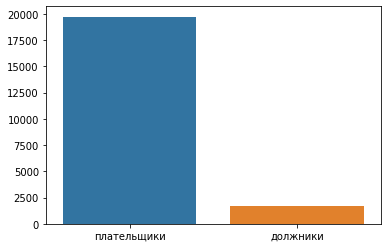

In [37]:
#визуализируем полученные данные о количестве плателщиков и должников, построим столбчатую диаграмму
data = ['плательщики', 'должники']
list = [19730, 1741]

import seaborn 
seaborn.barplot(x=data, y=list)

In [38]:
#на основе данных создадим нову таблицу filtr_df
data = [['плательщики', 2265604, 21205, 165551],
       ['должники', 2200852, 20667, 161334]]

columns = ['segment','income_max', 'income_min', 'income_mean']

filtr_df = pd.DataFrame(data=data, columns=columns) 
display(filtr_df)


,segment,income_max,income_min,income_mean
0,плательщики,2265604,21205,165551
1,должники,2200852,20667,161334


In [39]:
# напишем функцию

def alert_group(messages):
    
    if messages <=50000:
        return 'низкий'
    
    if messages <=200000:
        return 'средний'
    
    return 'высокий'

df['income_group'] = df['total_income'].apply(alert_group)

# проверим рабоу функции
#print(alert_group(45000))
#print(alert_group(100000))
print(alert_group(550000))

высокий


In [40]:
# выведем на экран таблицу df проверим добавление столбца
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas,purpose_group,income_group,children_debt
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n,недвижимость,высокий,плательщики с детьми
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n,автомобиль,средний,плательщики с детьми
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n,недвижимость,средний,плательщики без детей
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n,образование,высокий,плательщики с детьми
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n,свадьба,средний,плательщики без детей
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,покупка жилье \n,недвижимость,высокий,плательщики без детей
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операция с жилье \n,недвижимость,высокий,плательщики без детей
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование \n,образование,средний,плательщики без детей
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,на проведение свадьба \n,свадьба,средний,плательщики с детьми
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,покупка жилье для семья \n,недвижимость,средний,плательщики без детей


In [41]:
# отсортируем и сгруппируем данные по плательщикам
income_p = df[df['debt'] == 0].sort_values(by='income_group', ascending=False)
income_p.groupby('income_group')['income_group'].count()

income_group
высокий     4708
низкий       349
средний    14673
Name: income_group, dtype: int64

In [42]:
# отсортируем и сгруппируем данные по должникам
income_d = df[df['debt'] == 1].sort_values(by='income_group', ascending=False)
income_d.groupby('income_group')['income_group'].count()

income_group
высокий     358
низкий       23
средний    1360
Name: income_group, dtype: int64

**Вывод**

<div style="border:solid green 2px; padding: 20px">
Для того, чтобы узнать количество плательщиков и должников по кредиту в сигменте ежемесячный доход, сргуррировали данные по столбцу 'debt' методом groupby и произвели расчет методом count(). Данные показали, что тех кто оплачивает кредит вовремя гораздо больше чем должников.
- 0 - нет задолженности по кредиту 19730 заемщиков.
- 1 - должники 1741 заемщиков.
Расчитали отношение должников к добрасовестным плательщикам, что составило почти 9%. 

Визуализируем полученные данные о количестве плателщиков и должников, построим столбчатую диаграмму вывзвав библиотеку seaborn и передав ей данные по каждой категории заемщиков. По графику усматривается, что количество должников по сравнению с полательщиками намного меньше. Однако произведем детальный расчет.

Далее произвели расчет среднего месячного дохода плательщиков и должников:
- 0 - нет задолженности, средний доход в месяц составил 165551 руб.
- 1 - есть задолженность, средний доход в мсяц составил 161334 руб. 

Данные показали, что средний месячный доход плательщиков и должников практически одинаковый.

Расчитаем минимальное и максимальное значение уровня дохода. Для этого можно применить к значениям столбца 'total_income' встроенную функцию max() и min(), а можно отсортсортировать сгрупированные данные методом sort_values в порядке возрастания и получить максимальное и минимальное значение. Так максимальный уровень дохода заемщиков составил 2265604 руб., минимальный 20667 руб.

Далее отсортированили данные о доходе по категории плательщиков. Применили метод sort_values(by='total_income', ascending=False) для сортировки данных в порядке убывания.

Получили максимальный уровень дохода плательщиков 2265604 руб., минимальный 21205 руб. 
Максимальный уровень дохода должников 2200852 руб., минимальный 20667 руб.
Данные по этим показателям также практически не отличаются. На основе полученных данных создали новую таблицу data и вывели ее на экран.

Для более детального анадиза разделим уровень дохода заемщиков на категории и посмотрим, как распределяться в этом случае плательщики и должники.

Напишем функцию alert_group(), которая оценивает приоритет в зависимости от уровня дохода заемщика. Если доход не более 50000 руб., она возвращает 'низкий'. Если уровень дохода не более 200000 руб., она возвращает 'средний'. В остальных случаях вернет 'высокий'.

Затем проверим работу функции командой print(), подставляя разные показатели дохода. Функция работает корректно. Затем добавим новый столбец 'income_group' с данными в таблицу df.

Затем отсортируем данные столбца 'income_group' по должникам и по плательщикам методом ort_values(by='income_group', ascending=False), а затем сгруппируем методом count(), чтобы узнать количество должников и плательщиков по уровню дохода.

Итак группировка показала, что среди должников больше всего заемщиков со средним уровнем дохода (1360), а меньше всего с низким (23), с высоким уровнем дохода, тоже есть должники, их 358. 

И так, дополнительный анализ представленых на исследование данных показал, что нет зависимости между уровнем дохода и возвратом кредита в срок. Однако надо учесть, что в данных о доходе было много пропусков, которые могли повлиять на результаты исследования.

Гипотеза о том, что есть зависимость между уровнем дохода и возвратом кредита в срок не потдвержается частично.
</div>

- Как разные цели кредита влияют на его возврат в срок?

In [43]:
# для определения зависимоти между целями кредита и возвратом кредита в срок 
# отсортируем данные о плательщиках и должниках по каждой категории

# сортировка по должникам
index_d = df[df['debt'] == 1].sort_values(by='purpose_group', ascending=False)
# группировка по должникам
index_d.groupby('purpose_group')['purpose_group'].count()

purpose_group
автомобиль      403
недвижимость    782
образование     370
свадьба         186
Name: purpose_group, dtype: int64

In [44]:
# сортировака по плательщикам
index_p = df[df['debt'] == 0].sort_values(by='purpose_group', ascending=False)

# сгруппируем данные по плательщикам
index_p.groupby('purpose_group')['purpose_group'].count()

purpose_group
автомобиль       3905
недвижимость    10032
образование      3644
свадьба          2149
Name: purpose_group, dtype: int64

In [45]:
# на основе полученных данных создадим таблицу
data = [['недвижимость', 10032, 782],
        ['автомобиль', 3905, 403],
        ['образование', 3905, 370],
        ['свадьба', 2149, 186]]

columns = ['category','pay', 'debt']

fl = pd.DataFrame(data=data, columns=columns) 

# создадим в таблице fl новый столбец 'ratio' и сохраните в нём значение отношения должников
# 'debt' к плательщикам 'pay' по каждой категории
fl['ratio'] = (fl['debt'] / fl['pay']) * 100

# округлим значения столбца ratio 
fl['ratio'] = (round(fl['ratio'], 1))

# выведем таблицу family_frame на экран
fl

,category,pay,debt,ratio
0,недвижимость,10032,782,7.8
1,автомобиль,3905,403,10.3
2,образование,3905,370,9.5
3,свадьба,2149,186,8.7


In [46]:
# создаем таблицу методом pivot_table
data_pivot = ((df.pivot_table(index=['purpose_group'], values='debt')) * 100).round(1)
data_pivot

,debt
purpose_group,
автомобиль,9.4
недвижимость,7.2
образование,9.2
свадьба,8.0


In [48]:
# округлим столбец debt до целых чисел
data_pivot['debt'] = data_pivot['debt'] * 100
data_pivot['debt'] = (round(data_pivot['debt'], 1))

#выведем таблицу на экран
data_pivot

,debt
purpose_group,
автомобиль,94000.0
недвижимость,72000.0
образование,92000.0
свадьба,80000.0


**Вывод**

<div style="border:solid green 2px; padding: 20px">
Для определения зависимоти между целями кредита и возвратом кредита в срок, отсортируем данные о плательщиках и должниках по каждой категории методом sort_values(by='purpose_group', ascending=False). Затем сгруппироуем данные по столбцу 'purpose_group' методом .groupby и .count() и узнаем количество плательщиков и должников в каждой группе. 

Сгруппированные данные показали, что больше всего должников в группе 'недвижимость', однако и добросовестных плательщиков в этой группе тоже большее количество. Для более детального анализа расчитаем отношение должников к добросовестным плательщикам и добавим результаты в отдельную колонку таблицы fl. Выведем таблицу на экран командой display().

***
***   
Медодом pivot_table создадим сводную таблицу data_pivot с расчетом отношения должников к плательщикам в столбце 'debt', методом mean(), где функция aggfunc='mean' и добавим округлим получившиеся методом round() с 1 знаком после запятой. 
    
Расчеты показали, что больше всего должников в категории 'автомобиль' и 'образование', если считать эти показатели значимыми, то кредитному отделу банка следует с остарожностью вывадавать кредиты на эти цели и обращать внимание на другие показатели заемщиков этих категорий.

Гипотеза о том, что разные цели кредита влияют на его возврат в срок, подтверждается частично.
</div>

## Шаг 4. Общий вывод

<div style="border:solid green 2px; padding: 20px">
    
В результате анализа представленных данных, проведена проверка четырех гипотез и установлено:

    
    
1. Есть зависимость между наличием детей и возвратом кредита в срок.
    
- Первая гипотеза подтвердилась частично, т.к. разница между должниками по наличию детей есть, но не существенная.

    
2. Есть зависимость между семейным положением и возвратом кредита в срок.
    
- Вторая гипотеза подтвердилась частично, т.к. разница между должниками по категориям семейного положения есть,  не существенная.

    
3. Есть зависимость между уровнем дохода и возвратом кредита в срок.
    
- Третья гипотеза не подтвердилась лишь отчасти, т.к. учитывая, что изначально в данных о доходе было много пропусков, расчеты могли исказиться или оказаться другими.

    
4. Разные цели кредита влияют на его возврат в срок.
    
- Четвертая гипотеза подтвердилась частично, т.к. разница между должниками по целям кредита есть, но не существенная. 
</div>